## [심화] 결정 트리 실습 - Human Activity Recognition
-  데이터 전처리를 하여 사이킷런 입력값과 결과값을 설정한다
-  결정트리 모델을 만든다.
-  하이퍼 파라미터 튜닝을 한다(GridSearchCV를 사용해서)
-  중요도를 시각화한다.

In [1]:
print('https://www.kaggle.com/uciml/human-activity-recognition-with-smartphones')

https://www.kaggle.com/uciml/human-activity-recognition-with-smartphones


## [문제] train.csv를 받아서 train_score를 만들고, test.csv를 받아서 test_score를 생성하라

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
import os
os.getcwd()

'/Users/kimminsoo/Desktop/ML/ML/수업자료'

In [7]:
import os
os.rename('train.csv', 'human_train.csv')

In [8]:
import os
os.rename('test.csv', 'human_test.csv')

In [9]:

#train.csv파일을 다운로드 받은 후 humun_train.csv로 변경하시오
human_train = pd.read_csv('./human_train.csv')

#test.csv파일을 다운로드 받은 후 humun_test.csv로 변경하시오
human_test = pd.read_csv('./human_test.csv')

# random_state=28
# cv=3

In [14]:
# human_train.csv를 읽어 df_train 변수에 할당하시오
df_train = pd.read_csv('./human_train.csv')

# human_test.csv를 읽어 df_test변수에 할당하시오
df_test = pd.read_csv('./human_test.csv')


In [17]:
df_train

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,STANDING
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7347,0.299665,-0.057193,-0.181233,-0.195387,0.039905,0.077078,-0.282301,0.043616,0.060410,0.210795,...,-0.880324,-0.190437,0.829718,0.206972,-0.425619,-0.791883,0.238604,0.049819,30,WALKING_UPSTAIRS
7348,0.273853,-0.007749,-0.147468,-0.235309,0.004816,0.059280,-0.322552,-0.029456,0.080585,0.117440,...,-0.680744,0.064907,0.875679,-0.879033,0.400219,-0.771840,0.252676,0.050053,30,WALKING_UPSTAIRS
7349,0.273387,-0.017011,-0.045022,-0.218218,-0.103822,0.274533,-0.304515,-0.098913,0.332584,0.043999,...,-0.304029,0.052806,-0.266724,0.864404,0.701169,-0.779133,0.249145,0.040811,30,WALKING_UPSTAIRS
7350,0.289654,-0.018843,-0.158281,-0.219139,-0.111412,0.268893,-0.310487,-0.068200,0.319473,0.101702,...,-0.344314,-0.101360,0.700740,0.936674,-0.589479,-0.785181,0.246432,0.025339,30,WALKING_UPSTAIRS


In [15]:
# df_train의 기본 정보를 info() 메소드로 확인하시오
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7352 entries, 0 to 7351
Columns: 563 entries, tBodyAcc-mean()-X to Activity
dtypes: float64(561), int64(1), object(1)
memory usage: 31.6+ MB


In [18]:
# df_train의 컬럼(열)이름을 확인하시오
df_train.columns

Index(['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z',
       'tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z',
       'tBodyAcc-mad()-X', 'tBodyAcc-mad()-Y', 'tBodyAcc-mad()-Z',
       'tBodyAcc-max()-X',
       ...
       'fBodyBodyGyroJerkMag-kurtosis()', 'angle(tBodyAccMean,gravity)',
       'angle(tBodyAccJerkMean),gravityMean)',
       'angle(tBodyGyroMean,gravityMean)',
       'angle(tBodyGyroJerkMean,gravityMean)', 'angle(X,gravityMean)',
       'angle(Y,gravityMean)', 'angle(Z,gravityMean)', 'subject', 'Activity'],
      dtype='object', length=563)

In [20]:
# df_train의 클래스(레이블)의 분포를 비율로 확인하시오.
df_train.Activity.value_counts(normalize=True)

LAYING                0.191376
STANDING              0.186888
SITTING               0.174918
WALKING               0.166757
WALKING_UPSTAIRS      0.145947
WALKING_DOWNSTAIRS    0.134113
Name: Activity, dtype: float64

In [21]:
# df_train의 기초 통계량을 describe() 메소드로 확인하시오
df_train.describe()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject
count,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,...,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000
mean,0.274488,-0.017695,-0.109141,-0.605438,-0.510938,-0.604754,-0.630512,-0.526907,-0.606150,-0.468604,...,-0.307009,-0.625294,0.008684,0.002186,0.008726,-0.005981,-0.489547,0.058593,-0.056515,17.413085
std,0.070261,0.040811,0.056635,0.448734,0.502645,0.418687,0.424073,0.485942,0.414122,0.544547,...,0.321011,0.307584,0.336787,0.448306,0.608303,0.477975,0.511807,0.297480,0.279122,8.975143
min,-1.000000,-1.000000,-1.000000,-1.000000,-0.999873,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-0.995357,-0.999765,-0.976580,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,1.000000
25%,0.262975,-0.024863,-0.120993,-0.992754,-0.978129,-0.980233,-0.993591,-0.978162,-0.980251,-0.936219,...,-0.542602,-0.845573,-0.121527,-0.289549,-0.482273,-0.376341,-0.812065,-0.017885,-0.143414,8.000000
50%,0.277193,-0.017219,-0.108676,-0.946196,-0.851897,-0.859365,-0.950709,-0.857328,-0.857143,-0.881637,...,-0.343685,-0.711692,0.009509,0.008943,0.008735,-0.000368,-0.709417,0.182071,0.003181,19.000000
75%,0.288461,-0.010783,-0.097794,-0.242813,-0.034231,-0.262415,-0.292680,-0.066701,-0.265671,-0.017129,...,-0.126979,-0.503878,0.150865,0.292861,0.506187,0.359368,-0.509079,0.248353,0.107659,26.000000
max,1.000000,1.000000,1.000000,1.000000,0.916238,1.000000,1.000000,0.967664,1.000000,1.000000,...,0.989538,0.956845,1.000000,1.000000,0.998702,0.996078,1.000000,0.478157,1.000000,30.000000


In [24]:
# df_train의 결측치를 확인하시오
df_train.isnull().sum().sum()

0

In [25]:
# df_train을 활용하여 X_train, y_train set을 만들고, df_test를 활용하여 X_test, y_test set를 준비하시오

## 방법1) df_train.drop
## X_train = df_train.drop(['subject', 'Activity'], axis=1)
## 방법2) df_train.iloc => 2차원 array로 받음
X_train = df_train.iloc[:, :-2].values
y_train = df_train.iloc[:, -1].values
X_test = df_test.iloc[:, :-2].values
y_test = df_test.iloc[:, -1].values

# y 데이터 셋을 라벨인코딩 시킴


In [26]:
X_train.shape, X_test.shape

((7352, 561), (2947, 561))

In [27]:
y_train.shape, y_test.shape

((7352,), (2947,))

In [30]:
# 레코드 중복 확인 => 행끼리 중복되어있는지 확인
# 데이터프레임 중복 확인:  dataframe.duplicated()
df_train.drop(['subject', 'Activity'], axis=1).duplicated().sum()

# numpy 중복확인은 코딩으로 확인
for i in range(0, len(X_train)-1):
    if ((X_train[i] == X_train[i+1]).sum() == 561):
        print(i)
    else:
        pass


In [31]:
# 모델 성능 평가
from sklearn.metrics import accuracy_score, precision_score,recall_score
from sklearn.metrics import confusion_matrix, f1_score, roc_auc_score

def get_clf_score(y_test, y_pred):
    acc = accuracy_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    print("-"* 100)
    print("confusion matrix")
    print(cm)
    print("accuracy score: {:.4f}".format(acc))
    return acc

    

#### 결정 트리 모델 구축

In [33]:
# 모델 구축 및 학습
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()

dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [34]:
# 모델 평가
from sklearn.metrics import accuracy_score, confusion_matrix

y_pred = dt.predict(X_train)
print((f'train_score: {accuracy_score(y_train, y_pred):.3f}'))

y_pred = dt.predict(X_test)
print((f'train_score: {accuracy_score(y_test, y_pred):.3f}'))

train_score: 1.000
train_score: 0.862


In [54]:
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

lr_clf = LogisticRegression(solver='lbfgs', max_iter=500)
lr_clf.fit(X_train,y_train)

print(f'train_scores: {lr_clf.score(X_train,y_train)}')
print(f'test_scores: {lr_clf.score(X_test,y_test)}')

print('')

svm_clf = SVC(gamma='scale')
svm_clf.fit(X_train, y_train)

print(f'train_scores: {svm_clf.score(X_train,y_train)}')
print(f'test_scores: {svm_clf.score(X_test,y_test)}')

/Users/kimminsoo/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


train_scores: 0.9925190424374319
test_scores: 0.9613165931455717

train_scores: 0.9790533188248096
test_scores: 0.9504580929759077


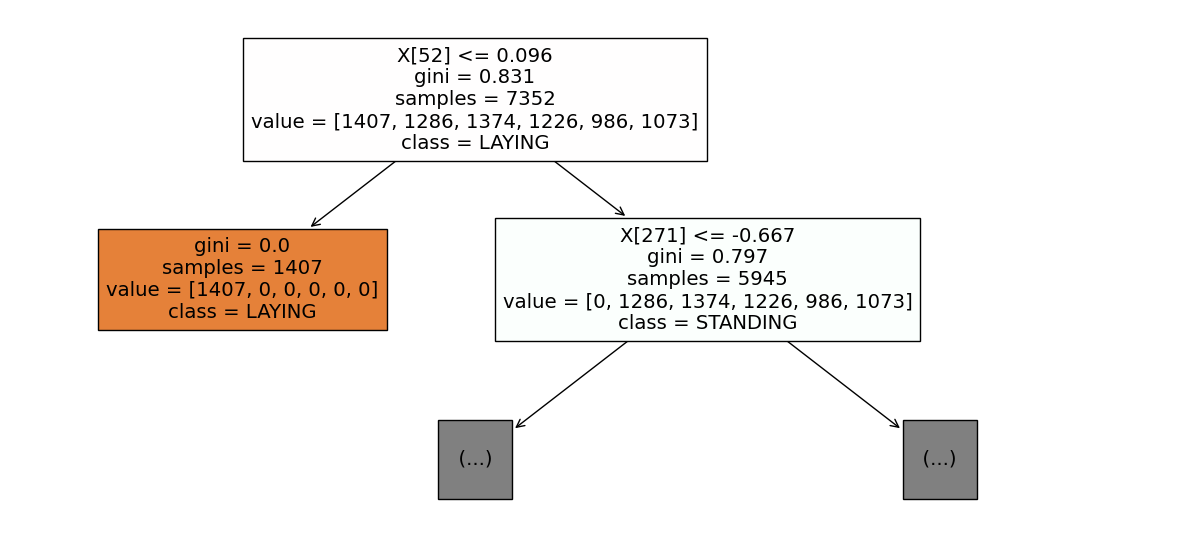

In [61]:
# 시각화
from sklearn.tree import plot_tree

plt.figure(figsize=(15, 7))
plot_tree(dt, max_depth=1, filled=True, class_names = le.classes_)
plt.show()

In [ ]:

# 하부 코드에 있는 라벨 인코더 객체를 사용했음.


####  y 데이터를 라벨 인코딩한 경우

In [58]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le.fit(y_train)
y_train_transformed = le.transform(y_train)
y_test_transformed = le.transform(y_test)

In [59]:
le.classes_

array(['LAYING', 'SITTING', 'STANDING', 'WALKING', 'WALKING_DOWNSTAIRS',
       'WALKING_UPSTAIRS'], dtype=object)

In [ ]:
# 과적합 및 모델 성능 개선
# 그리드 서치: 10분 이상 걸림

In [67]:
from sklearn.model_selection import GridSearchCV

dt_params = {
    'max_depth' :[3,5,7,9,11],
    'min_samples_split': [3,5,7,9,11],
    'min_samples_leaf':[2,4,6,8,10]
}
grid_dt = GridSearchCV(dt, param_grid=dt_params, cv=5)
grid_dt.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [3, 5, 7, 9, 11],
                         'min_samples_leaf': [2, 4, 6, 8, 10],
                         'min_samples_split': [3, 5, 7, 9, 11]})

In [68]:
grid_dt.best_params_

{'max_depth': 7, 'min_samples_leaf': 6, 'min_samples_split': 11}

In [69]:
grid_dt.score(X_train, y_train)

0.9572905331882481

In [70]:
grid_dt.score(X_test, y_test)

0.8663047166610112